In [0]:
from google.colab import drive
drive.mount('./drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./drive


In [0]:
!ls './drive/My Drive/Thesis Work'

 CambridgeMonoPhoneDf.pickle	      Implementation4.ipynb
'Cambridge Phones'		      Implementation5
 CambridgeWordFeaturesDf.pickle       Implementation6
 CheckScrapSpeed.ipynb		      Implementation6.ipynb
 ConvertToWav.ipynb		      L2monoPhoneDfTest.pickle
'Copy of Benchmark.ipynb'	      L2monoPhoneDfTrain.pickle
'Copy of l2arctic_release_v2.0.zip'  'L2 Phones'
 DelIfCopiesFine.ipynb		      L2WordFeaturesDfTest.pickle
 Implementation1		      L2WordFeaturesDfTrain.pickle
 Implementation1.ipynb		      MostCommon3000Oxford.txt
 Implementation2		      OutlierDetection.ipynb
 Implementation2.ipynb		     'PYOD Examples'
 Implementation3		      SVMPhoneLevel.ipynb
 Implementation3.ipynb		      UKpronunciations
 Implementation4		      USpronunciations


Bism  
# Imports

In [0]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import os

#SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import sklearn.metrics as sklm
from sklearn.manifold import TSNE

# Implementation 8  (PHONE LEVEL)
## Using L2Training set
## L2 as val+test set
## SVM

In [4]:
phones = [file[:-4] for file in os.listdir('./drive/My Drive/Thesis Work/L2 Phones/Train/')]
len(phones)

42

In [0]:
phone = 'B'

### Training

#### X_TRAIN

In [12]:
X = np.vstack((np.load('./drive/My Drive/Thesis Work/L2 Phones/Train/'+phone+'.npy'),
               np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/x.npy')))
X.shape

(1597, 13, 50, 3)

#### Y_TRAIN

In [13]:
y = np.vstack((np.ones(np.load('./drive/My Drive/Thesis Work/L2 Phones/Train/'+phone+'.npy').shape[0]).reshape(-1,1),
               np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/y.npy').reshape(-1,1))).reshape(-1)
y.shape

(1597,)

I now have X and y

#### TRAIN TEST SPLIT

In [0]:
#will also shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
X_train.shape

(1117, 13, 50, 3)

In [0]:
#SKlearn SVM take <=2d X ONLY
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

#### Visualising the features

In [0]:
from sklearn.manifold import TSNE

X_test2D = TSNE(n_components=2).fit_transform(X_test)
X_train2D = TSNE(n_components=2).fit_transform(X_train)
print(X_train2D.shape)
print(X_test2D.shape)

(1208, 2)
(519, 2)


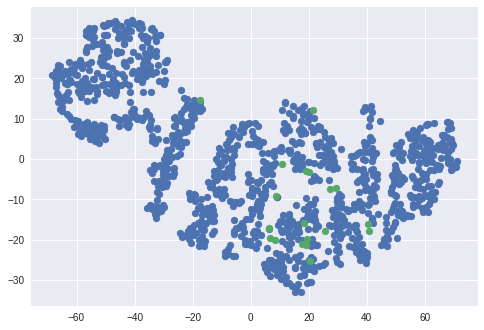

In [0]:
plt.scatter(X_train2D[:, 0][y_train == 1], X_train2D[:, 1][y_train == 1])
plt.scatter(X_test2D[:, 0][y_test == 0], X_test2D[:, 1][y_test == 0])

In [0]:
def plotTrainTestScatter(phone):
  print("Phone: ",phone)
  X = np.vstack((np.load('./drive/My Drive/Thesis Work/L2 Phones/Train/'+phone+'.npy'),
                 np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/x.npy')))
  y = np.vstack((np.ones(np.load('./drive/My Drive/Thesis Work/L2 Phones/Train/'+phone+'.npy').shape[0]).reshape(-1,1),
                 np.load('./drive/My Drive/Thesis Work/L2 Phones/Test/'+phone+'/y.npy').reshape(-1,1))).reshape(-1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
  X_train = X_train.reshape(X_train.shape[0],-1)
  X_test = X_test.reshape(X_test.shape[0],-1)

  X_test2D = TSNE(n_components=2).fit_transform(X_test)
  X_train2D = TSNE(n_components=2).fit_transform(X_train)

  print(X_train2D.shape)
  print(X_test2D.shape)

  plt.scatter(X_train2D[:, 0][y_train == 1], X_train2D[:, 1][y_train == 1])
  plt.scatter(X_test2D[:, 0][y_test == 0], X_test2D[:, 1][y_test == 0])

Phone:  Z
(1505, 2)
(646, 2)


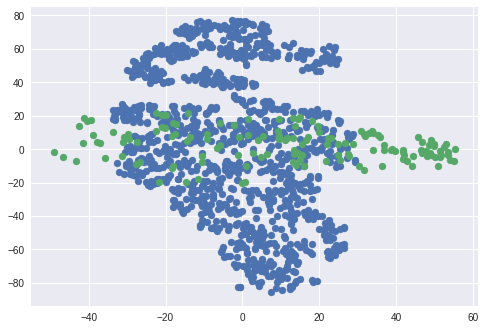

In [0]:
plotTrainTestScatter(phones[0])

#### PCA

In [0]:
X_train.shape

(1208, 1950)

<BarContainer object of 1117 artists>

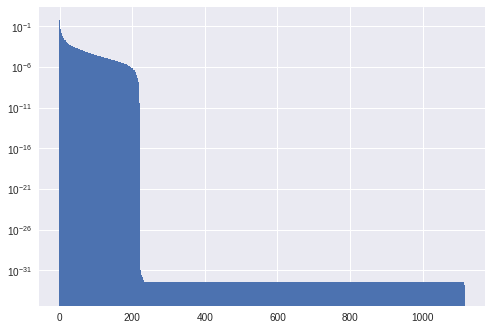

In [17]:
n_components = X_train.shape[0]
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
plt.bar(range(n_components),pca.explained_variance_ratio_,1,log=True)

In [0]:
n_components = 220
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

In [0]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### MODEL

In [23]:
param_grid = {'C': [1e-2,1e-1,1e1,1e2,1e3],
              'gamma': [0.0001,0.001,0.01,0.1,1], }
clf = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print(clf.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [0]:
y_pred = clf.predict(X_test_pca) #pca ones here also

In [25]:
print(classification_report(y_test, y_pred, target_names=['Mispronounced','Correct']))
print(confusion_matrix(y_test, y_pred, labels=range(2)))

print(sklm.roc_curve(y_test,y_pred))
print('FAR = ', sklm.roc_curve(y_test,y_pred)[0][1]*100,'%')
print('FRR = ', (1 - sklm.roc_curve(y_test,y_pred)[1][1])*100,'%')
print("AUC_SCORE = ", sklm.roc_auc_score(y_test,y_pred)*100,'%')

               precision    recall  f1-score   support

Mispronounced       0.00      0.00      0.00         4
      Correct       0.99      1.00      1.00       476

    micro avg       0.99      0.99      0.99       480
    macro avg       0.50      0.50      0.50       480
 weighted avg       0.98      0.99      0.99       480

[[  0   4]
 [  0 476]]
(array([0., 1.]), array([0., 1.]), array([2., 1.]))
FAR =  100.0 %
FRR =  0.0 %
AUC_SCORE =  50.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
